# Library

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.io import arff

In [54]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe, fe, anomaly_detection, scoring

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load data

In [33]:
filePath = f'E:/gitlab/machine-learning/dataset/creditcard.csv'
df = pd.read_csv(filepath_or_buffer=filePath, header=0, sep=',')
print(df.shape[0])
df.head()

284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Isolation Forest

In [35]:
## Encoding the categorical column 
from sklearn.preprocessing import LabelEncoder
encs = dict()
kdd_data_1 = df.copy() #.sample(frac=1)
for c in kdd_data_1.columns:
    if kdd_data_1[c].dtype == 'object':
        encs[c] = LabelEncoder()
        kdd_data_1[c] = encs[c].fit_transform(kdd_data_1[c])## Encoding the categorical column 

In [36]:
X_train, y_train = kdd_data_1.drop("Class", axis=1), kdd_data_1['Class'].values

In [27]:
y_pred,outlier_scores,scores = anomaly_detection.ifa_ad(X_train,200,rs=np.random.RandomState(19))

In [37]:
kdd_data_1['scores'] = scores
kdd_data_1['outlier_scores'] = outlier_scores
kdd_data_1['y_pred'] = y_pred

In [39]:
describe.freq_unique_com(kdd_data_1,['outlier_scores','y_pred'])

,outlier_scores,y_pred,n,support,observed %
0,0,-1,8736,0.0307,3.07
1,0,1,274646,0.9643,96.43
2,1,-1,1425,0.0050,0.50


In [40]:
kdd_data_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,scores,outlier_scores,y_pred
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.108674,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.126374,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.040997,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.091799,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.107718,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.130593,1,-1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.097336,0,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.102451,0,1
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.066288,0,1


comfusion matrix = 
[[283117   1198]
 [   265    227]]


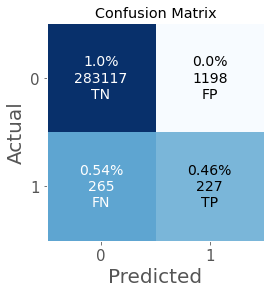


accuracy_score =  0.9949
balanced_accuracy_score =  0.7286

precision score =  0.1593
average precision score =  0.0744
recall score =  0.4614

F1 score =  0.2368
F2 score =  0.3345
F3 score =  0.3878
F_beta score (0.5) =  0.1833
Matthews Correlation Coefficient score =  0.2691
Cohens kappa =  0.2349

Expected Approval Rate =  0.005
Expected Default Rate =  0.8407

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.16      0.46      0.24       492

    accuracy                           0.99    284807
   macro avg       0.58      0.73      0.62    284807
weighted avg       1.00      0.99      1.00    284807


time span=  1


In [52]:
scoring.print_score(kdd_data_1['Class'],kdd_data_1['outlier_scores'],y_probs=None,types='classification',labels=[0,1],time1=1,time2=2,X_train=None, y_train=None,X_test=None)

In [63]:
mat = loadmat(f'E:/gitlab/machine-learning/dataset/outlier/cover.mat')
cardio_df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
cardio_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2804,139,9,268,65,3180,234,238,135,6121,0
1,2785,155,18,242,118,3090,238,238,122,6211,0
2,2579,132,6,300,-15,67,230,237,140,6031,0
3,2886,151,11,371,26,5253,234,240,136,4051,0
4,2742,134,22,150,69,3215,248,224,92,6091,0


In [65]:
data = arff.loadarff(f'E:/gitlab/machine-learning/dataset/outlier/seismic-bumps.arff')
df = pd.DataFrame(data[0])

df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


# Anomaly Detection with autoencoder

model_autoencoder   ->  calculate_error ->  draw_anomaly

# Anomaly Detection with Encoder Decoder - Temporal convolutional networks (ED - TCN)

model_ed_tcn

# Anomaly detection with LSTM (time series data)

sequence_trimmed -> model_lstm -> lstm_result ->  draw_anomaly

# Anomaly Detection with Temporal convolutional networks (TCN)

model_tcn

# Anomaly Detection with the Restricted Boltzmann machines (RBM)

RBM

# Anomaly Detection with Variational Autoencoder

sampling -> model_var_autoencoder  ->  calculate_error ->  draw_anomaly

# Anomaly Detection with autoencoder CNN

model_autoencoder_cnn   ->  calculate_error ->  draw_anomaly

In [36]:
describe.freq_unique_com(df,['scores','y_pred'])

,scores,y_pred,n,support,observed %
0,0,-1,52295,0.0839,8.39
1,0,1,567680,0.9111,91.11
2,1,-1,3116,0.0050,0.50
